# General Imports and dataset preparation


In [3]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
# General imports

import matplotlib.pyplot as plt
import os
import random
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers

In [4]:
!wget https://mmlab.ie.cuhk.edu.hk/archive/cufsf/files/original_sketch.zip
!unzip original_sketch.zip

--2024-02-03 17:51:20--  https://mmlab.ie.cuhk.edu.hk/archive/cufsf/files/original_sketch.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.16
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85755238 (82M) [application/zip]
Saving to: ‘original_sketch.zip’

original_sketch.zip 100%[===================>]  81.78M  13.2MB/s    in 5.3s    

2024-02-03 17:51:26 (15.4 MB/s) - ‘original_sketch.zip’ saved [85755238/85755238]

Archive:  original_sketch.zip
   creating: original_sketch/
  inflating: original_sketch/00001.jpg  
  inflating: original_sketch/00002.jpg  
  inflating: original_sketch/00003.jpg  
  inflating: original_sketch/00004.jpg  
  inflating: original_sketch/00005.jpg  
  inflating: original_sketch/00006.jpg  
  inflating: original_sketch/00007.jpg  
  inflating: original_sketch/00008.jpg  
  inflating: original_sketch/00009.jpg  
  inflating: original_sketch/

In [ ]:
# prompt: convert images in original_sketch folder into a list of images split it between training and testing data


# im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)

# Get a list of all files in the directory
files = os.listdir('original_sketch')

# Load all images into a list
images = []
for file in files:
  img = cv2.imread(os.path.join('original_sketch', file))
  im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  im_gray = cv2.resize(im_gray, (28,28), interpolation = cv2.INTER_AREA)

  images.append(im_gray)

# images = np.array(images) # convert the list to a NumPy array

# Split the images into training and testing sets
x_train, x_test = train_test_split(images, test_size=0.2)

X_train = np.stack(x_train, axis=0)
X_test = np.stack(x_test, axis=0)


X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

x_train = X_train
x_test = X_test


# Simple GAN

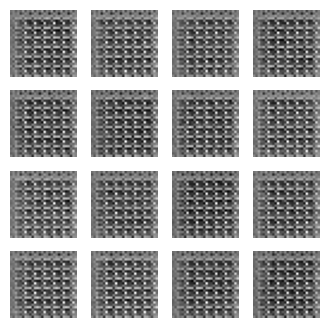

Epoch 1 done


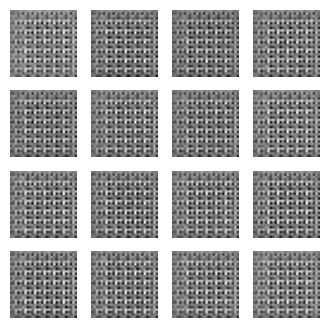

Epoch 2 done


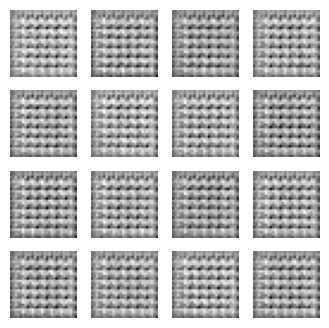

Epoch 3 done


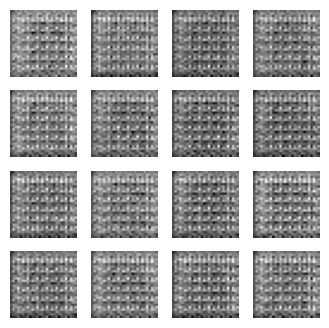

Epoch 4 done


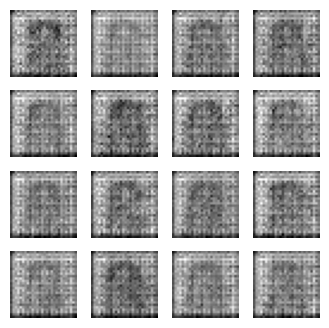

Epoch 5 done


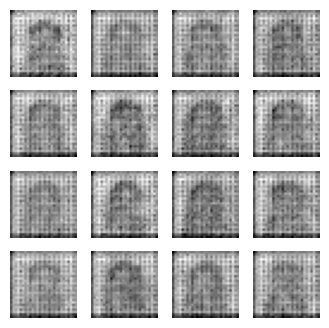

Epoch 6 done


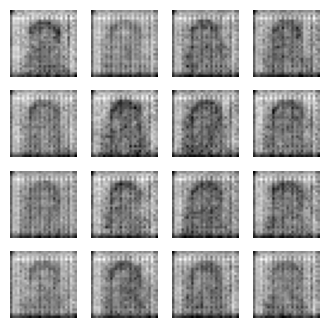

Epoch 7 done


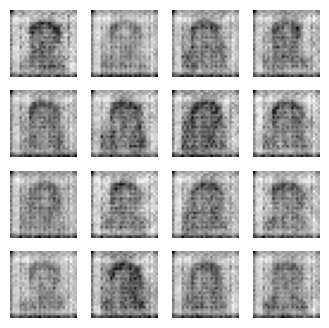

Epoch 8 done


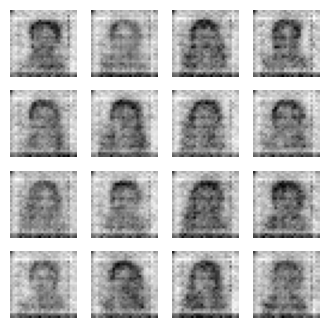

Epoch 9 done


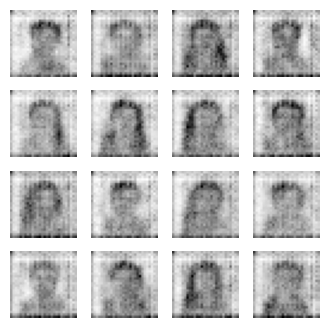

Epoch 10 done


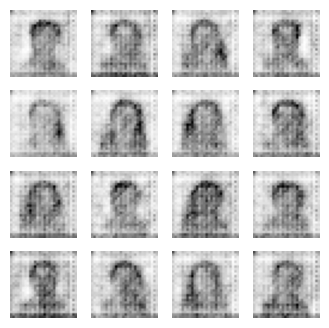

Epoch 11 done


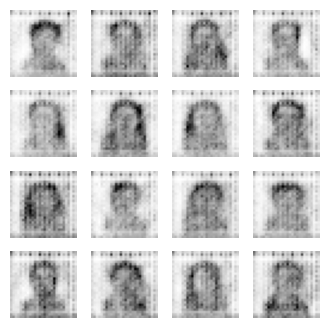

Epoch 12 done


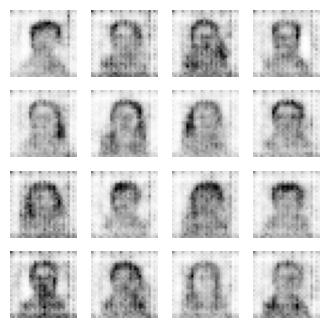

Epoch 13 done


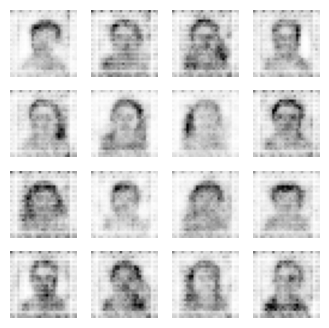

Epoch 14 done


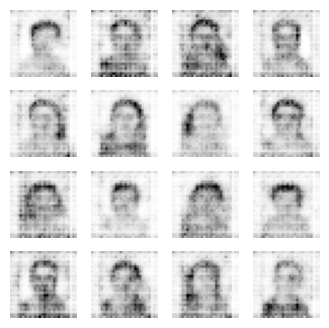

Epoch 15 done


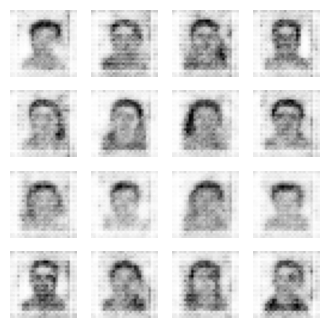

Epoch 16 done


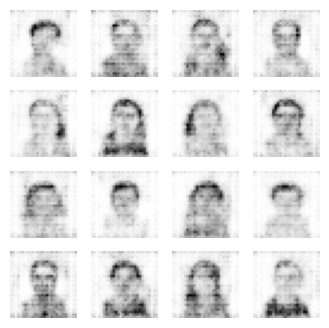

Epoch 17 done


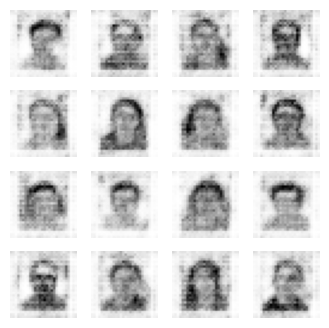

Epoch 18 done


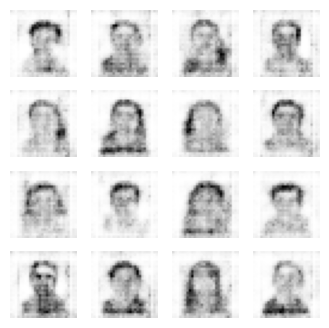

Epoch 19 done


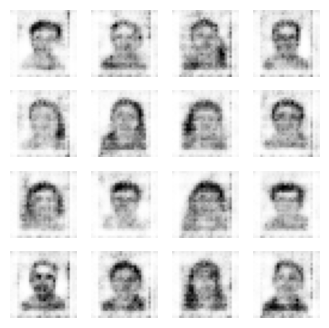

Epoch 20 done


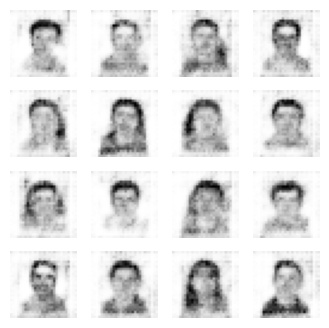

Epoch 21 done


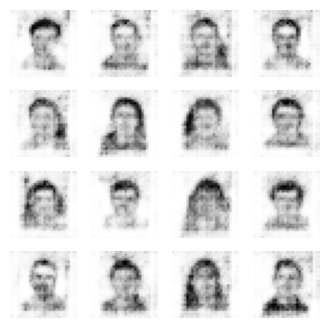

Epoch 22 done


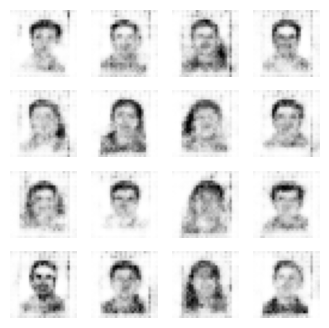

Epoch 23 done


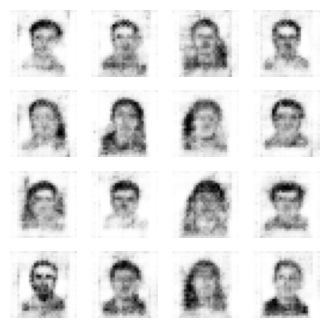

Epoch 24 done


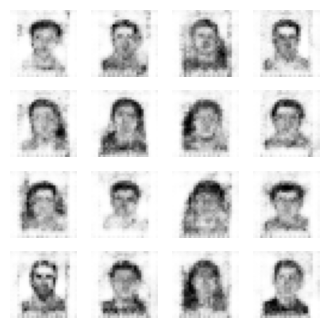

Epoch 25 done


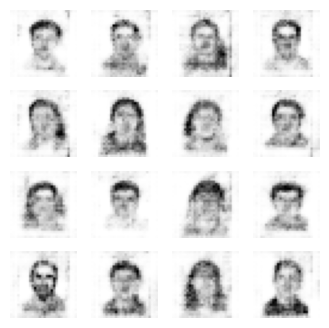

Epoch 26 done


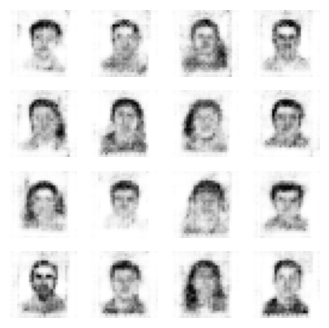

Epoch 27 done


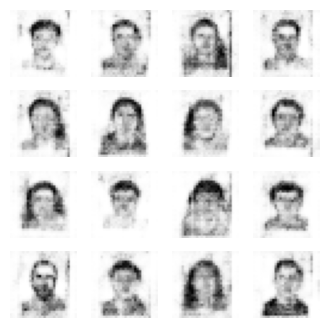

Epoch 28 done


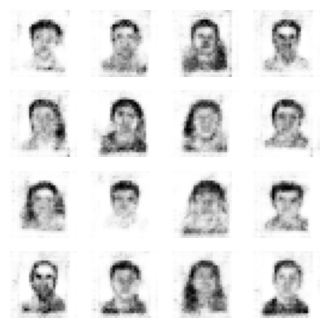

Epoch 29 done


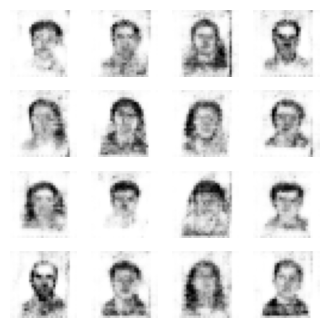

Epoch 30 done


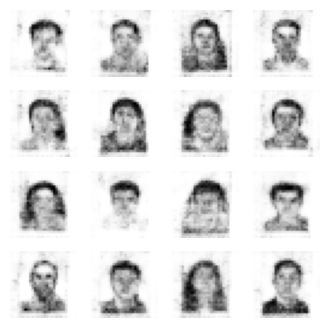

Epoch 31 done


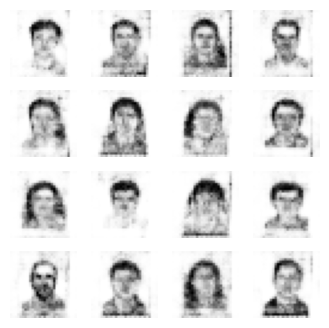

Epoch 32 done


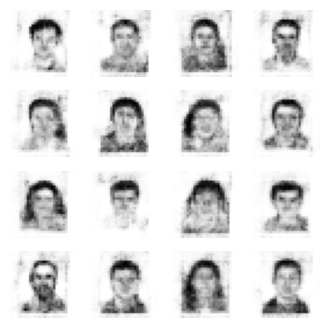

Epoch 33 done


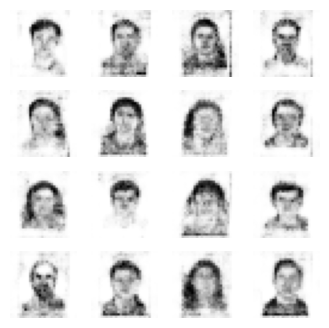

Epoch 34 done


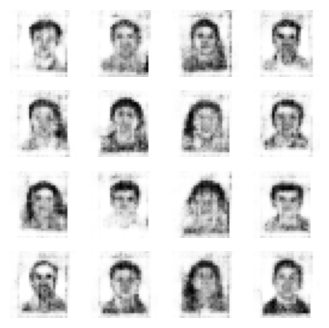

Epoch 35 done


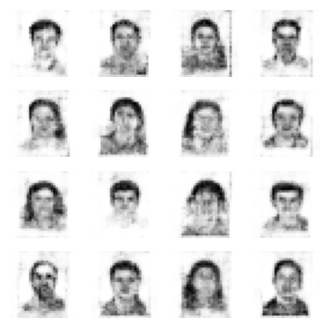

Epoch 36 done


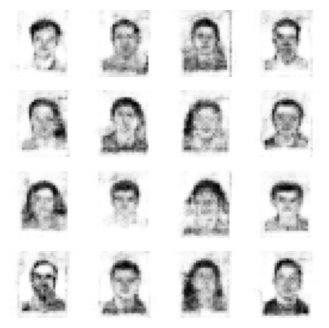

Epoch 37 done


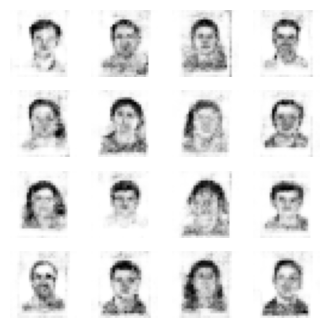

Epoch 38 done


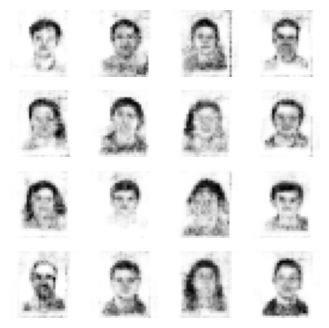

Epoch 39 done


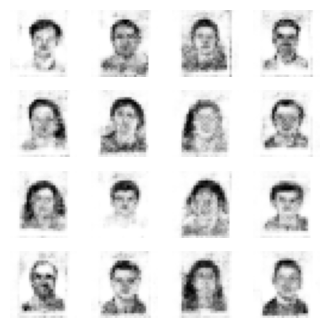

Epoch 40 done


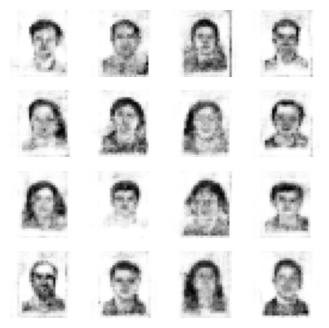

Epoch 41 done


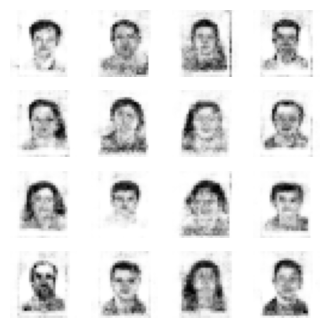

Epoch 42 done


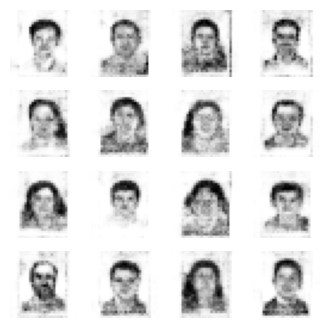

Epoch 43 done


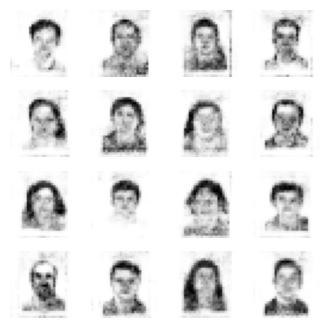

Epoch 44 done


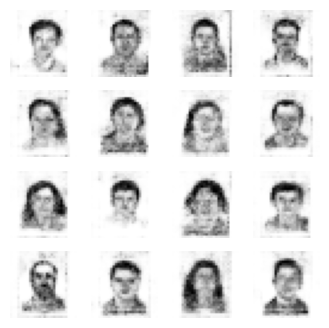

Epoch 45 done


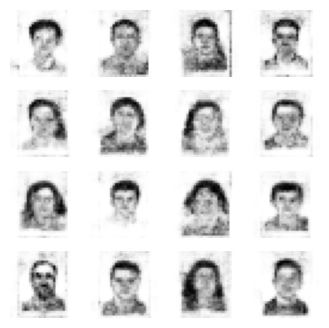

Epoch 46 done


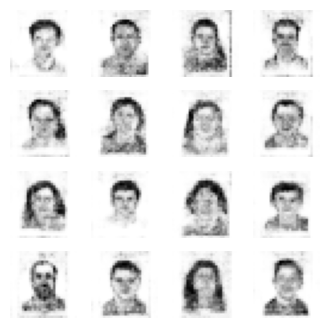

Epoch 47 done


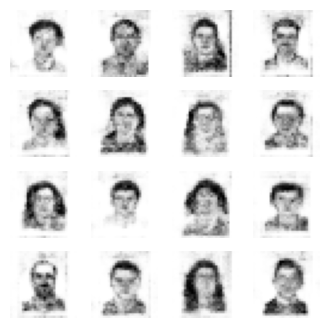

Epoch 48 done


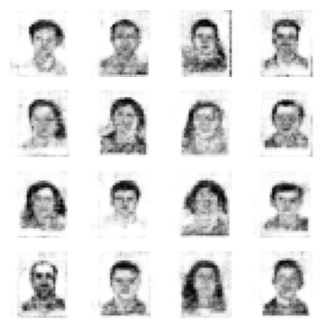

Epoch 49 done


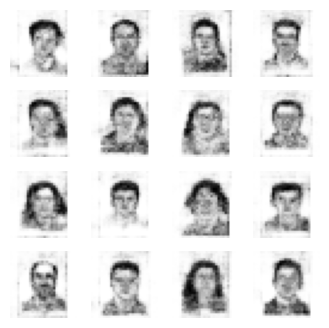

Epoch 50 done


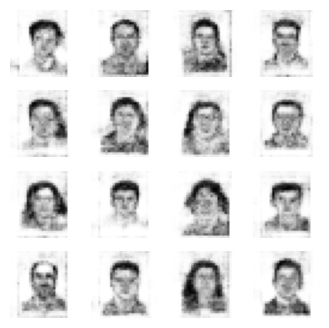

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameters
latent_dim = 100 # the dimension of the latent space
batch_size = 64 # the size of the mini-batches
epochs = 50 # the number of training epochs
learning_rate = 0.0002 # the learning rate for the optimizer
beta_1 = 0.5 # the beta_1 parameter for the optimizer

# Define the generator model
def generator_model():
  # Create a sequential model
  model = keras.Sequential()
  # Add a dense layer that takes the latent vector as input and outputs a 7x7x256 tensor
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(latent_dim,)))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Reshape the output to a 7x7x256 tensor
  model.add(layers.Reshape((7, 7, 256)))
  # Add a convolutional transpose layer that outputs a 14x14x128 tensor
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Add another convolutional transpose layer that outputs a 28x28x64 tensor
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Add a final convolutional transpose layer that outputs a 28x28x1 tensor
  model.add(layers.Conv2DTranspose(1, (5, 5), padding='same', use_bias=False, activation='tanh'))
  # Return the model
  return model

# Define the discriminator model
def discriminator_model():
  # Create a sequential model
  model = keras.Sequential()
  # Add a convolutional layer that takes a 28x28x1 image as input and outputs a 14x14x64 tensor
  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
  # Add a LeakyReLU activation layer with alpha=0.2
  model.add(layers.LeakyReLU(0.2))
  # Add another convolutional layer that outputs a 7x7x128 tensor
  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a LeakyReLU activation layer with alpha=0.2
  model.add(layers.LeakyReLU(0.2))
  # Flatten the output
  model.add(layers.Flatten())
  # Add a dense layer that outputs a scalar
  model.add(layers.Dense(1))
  # Return the model
  return model

# Create the generator and the discriminator
generator = generator_model()
discriminator = discriminator_model()

# Define the binary cross-entropy loss function
bce = keras.losses.BinaryCrossentropy(from_logits=True)

# Define the discriminator loss function
def discriminator_loss(real_output, fake_output):
  # Compute the loss for the real images
  real_loss = bce(tf.ones_like(real_output), real_output)
  # Compute the loss for the fake images
  fake_loss = bce(tf.zeros_like(fake_output), fake_output)
  # Return the total loss
  return real_loss + fake_loss

# Define the generator loss function
def generator_loss(fake_output):
  # Compute the loss for the fake images
  return bce(tf.ones_like(fake_output), fake_output)

# Define the optimizers for the generator and the discriminator
generator_optimizer = keras.optimizers.Adam(learning_rate, beta_1)
discriminator_optimizer = keras.optimizers.Adam(learning_rate, beta_1)

# Define a function to generate and save images
def generate_and_save_images(model, epoch, test_input):
  # Generate images from the test input
  predictions = model(test_input, training=False)
  # Plot the images in a 4x4 grid
  fig = plt.figure(figsize=(4, 4))
  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
  # Save the figure
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(batch_size)

# Create a random vector to test the generator
test_input = tf.random.normal([16, latent_dim])

# Define the training loop
@tf.function
def train_step(images):
  # Generate random noise
  noise = tf.random.normal([batch_size, latent_dim])
  # Use GradientTape to record the gradients
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    # Generate fake images using the generator
    generated_images = generator(noise, training=True)
    # Classify the real and fake images using the discriminator
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    # Compute the generator and discriminator losses
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)
  # Compute the gradients for the generator and the discriminator
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  # Apply the gradients to the optimizer
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  return gen_loss, disc_loss
# Train the DCGAN
# Initialize lists to store the losses
gen_losses = []
disc_losses = []

for epoch in range(epochs):
  # Loop over the batches
  for image_batch in train_dataset:
    # Train the model on the current batch
    gen_loss, disc_loss = train_step(image_batch)

  # Append the losses to the lists
  gen_losses.append(gen_loss)
  disc_losses.append(disc_loss)

  # Generate and save images at the end of each epoch
  generate_and_save_images(generator, epoch + 1, test_input)
  # Print the current epoch
  print ('Epoch {} done'.format(epoch + 1))


# Generate and save the final images
generate_and_save_images(generator, epochs, test_input)


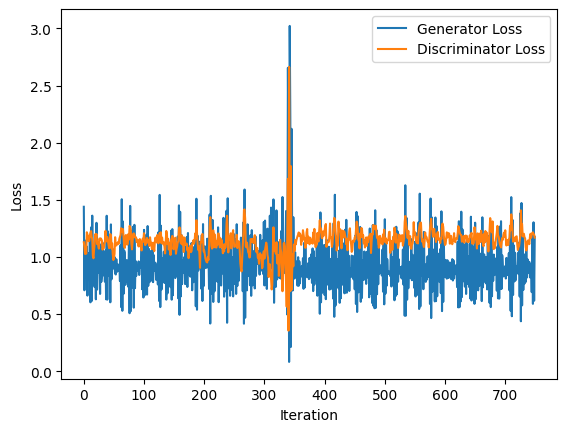

In [ ]:
# prompt: given gen_loss and disc_loss in each iteration plot both loses against number of iterations

# Initialize lists to store the losses
gen_losses = []
disc_losses = []

# Loop over the epochs
for epoch in range(epochs):
  # Loop over the batches
  for image_batch in train_dataset:
    # Train the model on the current batch
    gen_loss, disc_loss = train_step(image_batch)
    # Append the losses to the lists
    gen_losses.append(gen_loss)
    disc_losses.append(disc_loss)

# Plot the losses
plt.plot(gen_losses, label="Generator Loss")
plt.plot(disc_losses, label="Discriminator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Higher resolution More Complex GAN



In [ ]:
# prompt: convert images in original_sketch folder into a list of images split it between training and testing data


# im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)

# Get a list of all files in the directory
files = os.listdir('original_sketch')

# Load all images into a list
images = []
for file in files:
  img = cv2.imread(os.path.join('original_sketch', file))
  im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  im_gray = cv2.resize(im_gray, (128,128), interpolation = cv2.INTER_AREA)

  images.append(im_gray)

# images = np.array(images) # convert the list to a NumPy array

# Split the images into training and testing sets
x_train, x_test = train_test_split(images, test_size=0.2)

X_train = np.stack(x_train, axis=0)
X_test = np.stack(x_test, axis=0)


X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

x_train = X_train
x_test = X_test

In [ ]:

# Define the hyperparameters
latent_dim = 100 # the dimension of the latent space
batch_size = 64 # the size of the mini-batches
epochs = 5000 # the number of training epochs
learning_rate = 0.0002 # the learning rate for the optimizer
beta_1 = 0.5 # the beta_1 parameter for the optimizer
# Define the generator model
def generator_model():
  # Create a sequential model
  model = keras.Sequential()
  # Add a dense layer that takes the latent vector as input and outputs a 8x8x256 tensor
  model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(latent_dim,)))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Reshape the output to a 8x8x256 tensor
  model.add(layers.Reshape((8, 8, 256)))
  # Add a convolutional transpose layer that outputs a 16x16x128 tensor
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Add another convolutional transpose layer that outputs a 32x32x64 tensor
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Add another convolutional transpose layer that outputs a 64x64x32 tensor
  model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  # Add another convolutional transpose layer that outputs a 128x128x16 tensor
  model.add(layers.Conv2DTranspose(16, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a ReLU activation layer
  model.add(layers.ReLU())
  #Add a final convolutional transpose layer that outputs a 128x128x1 tensor
  model.add(layers.Conv2DTranspose(1, (5, 5), padding='same', use_bias=False, activation='tanh'))
  # Return the model
  return model

# Define the discriminator model
def discriminator_model():
  # Create a sequential model
  model = keras.Sequential()
  # Add a convolutional layer that takes a 128x128x1 image as input and outputs a 64x64x32 tensor
  model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 1]))
  # Add a LeakyReLU activation layer with alpha=0.2
  model.add(layers.LeakyReLU(0.2))
  # Add another convolutional layer that outputs a 32x32x64 tensor
  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a LeakyReLU activation layer with alpha=0.2
  model.add(layers.LeakyReLU(0.2))
  # Add another convolutional layer that outputs a 16x16x128 tensor
  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a LeakyReLU activation layer with alpha=0.2
  model.add(layers.LeakyReLU(0.2))
  # Add another convolutional layer that outputs a 8x8x256 tensor
  model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
  # Add a batch normalization layer
  model.add(layers.BatchNormalization())
  # Add a LeakyReLU activation layer with alpha=0.2
  model.add(layers.LeakyReLU(0.2))
  # Flatten the output
  model.add(layers.Flatten())
  # Add a dense layer that outputs a scalar
  model.add(layers.Dense(1))
  # Return the model
  return model


# Create the generator and the discriminator
generator = generator_model()
discriminator = discriminator_model()
# Define the binary cross-entropy loss function
bce = keras.losses.BinaryCrossentropy(from_logits=True)

# Define the discriminator loss function
def discriminator_loss(real_output, fake_output):
  # Compute the loss for the real images
  real_loss = bce(tf.ones_like(real_output), real_output)
  # Compute the loss for the fake images
  fake_loss = bce(tf.zeros_like(fake_output), fake_output)
  # Return the total loss
  return real_loss + fake_loss

# Define the generator loss function
def generator_loss(fake_output):
  # Compute the loss for the fake images
  return bce(tf.ones_like(fake_output), fake_output)

# Define the optimizers for the generator and the discriminator
generator_optimizer = keras.optimizers.Adam(learning_rate, beta_1)
discriminator_optimizer = keras.optimizers.Adam(learning_rate, beta_1)

# Define a function to generate and save images
def generate_and_save_images(model, epoch, test_input):
  # Generate images from the test input
  predictions = model(test_input, training=False)
  # Plot the images in a 4x4 grid
  fig = plt.figure(figsize=(4, 4))
  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
  # Save the figure
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

# Create a dataset object
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(954).batch(batch_size)

# Create a random vector to test the generator
test_input = tf.random.normal([16, latent_dim])
gen_losses = []
disc_losses = []
# Define the training loop
@tf.function
def train_step(images):
  # Generate random noise
  noise = tf.random.normal([batch_size, latent_dim])
  # Use GradientTape to record the gradients
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    # Generate fake images using the generator
    generated_images = generator(noise, training=True)
    # Classify the real and fake images using the discriminator
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    # Compute the generator and discriminator losses
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)
    gen_losses.append(gen_loss)
    disc_losses.append(disc_loss)
  # Compute the gradients for the generator and the discriminator
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  # Apply the gradients to the optimizer
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



In [ ]:
# Train the DCGAN
for epoch in range(epochs):
  # Loop over the batches
  for image_batch in train_dataset:
    # Train the model on the current batch
    train_step(image_batch)

# Generate and save the final images
generate_and_save_images(generator, epochs, test_input)


for epoch in range(epochs):
  # Loop over the batches
  for image_batch in train_dataset:
    # Train the model on the current batch
    train_step(image_batch)

  if epoch % 1000 == 0:
    # Generate and save images at the end of each epoch
    generate_and_save_images(generator, epoch + 1, test_input)
    # Print the current epoch
    print ('Epoch {} done'.format(epoch + 1))



# Generate and save the final images
generate_and_save_images(generator, epochs, test_input)


In [ ]:
gen_losses

In [ ]:
# prompt: plot gen_losses and disc_losses

plt.plot(gen_losses, label="Generator Loss")
plt.plot(disc_losses, label="Discriminator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
# Generate 16 random vectors
random_vectors = tf.random.normal([16, latent_dim])
# Generate images from the random vectors
generated_images = generator(random_vectors, training=False)
# Plot the images in a 4x4 grid
fig = plt.figure(figsize=(4, 4))
for i in range(generated_images.shape[0]):
  plt.subplot(4, 4, i+1)
  plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
  plt.axis('off')
# Show the figure
plt.show()


# CelebA

In [ ]:
!mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

mkdir: cannot create directory ‘data_faces’: File exists


In [ ]:
import zipfile

with zipfile.ZipFile("celeba.zip","r") as zip_ref:
  zip_ref.extractall("data_faces/")


In [ ]:
# Get a list of all files in the directory

root = 'data_faces/img_align_celeba'
files = os.listdir(root)

In [ ]:
files = files [:1000]


10000


In [ ]:

# Load all images into a list
images = []
for file in files:
  img = cv2.imread(os.path.join(root, file))
  im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  im_gray = cv2.resize(im_gray, (128,128), interpolation = cv2.INTER_AREA)

  images.append(im_gray)

# images = np.array(images) # convert the list to a NumPy array

# Split the images into training and testing sets
x_train, x_test = train_test_split(images, test_size=0.2)

X_train = np.stack(x_train, axis=0)
X_test = np.stack(x_test, axis=0)


X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

x_train = X_train
x_test = X_test


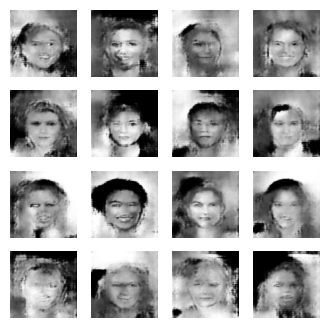

Epoch 1 done


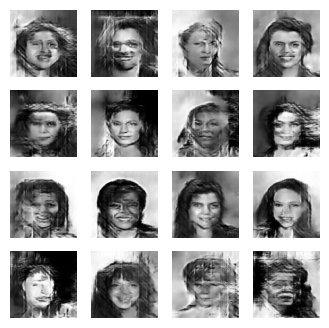

Epoch 11 done


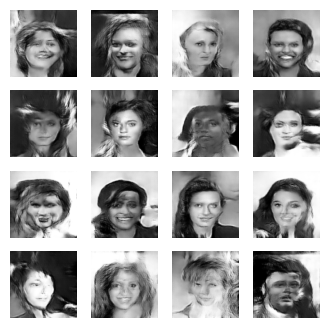

Epoch 21 done


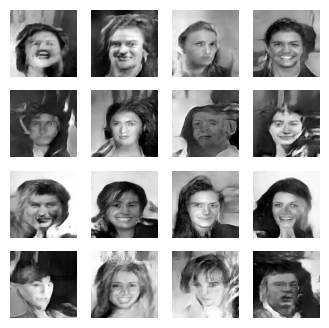

Epoch 31 done


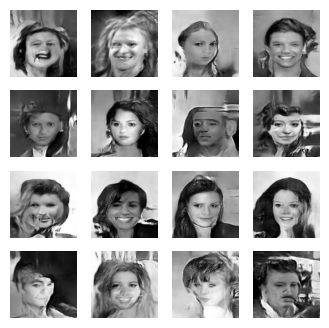

Epoch 41 done


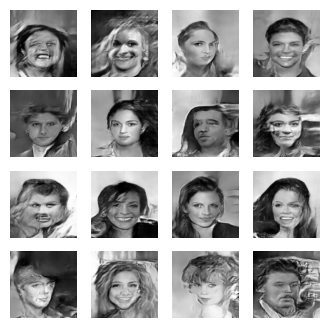

Epoch 51 done


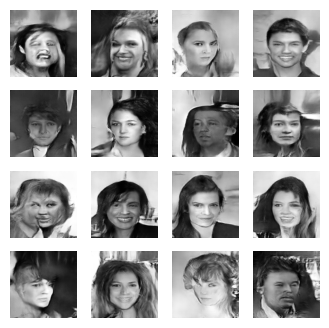

Epoch 61 done


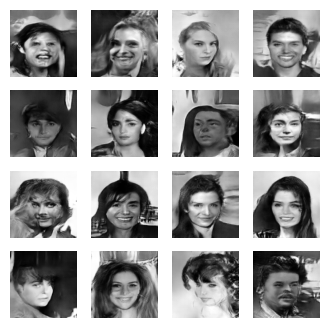

Epoch 71 done


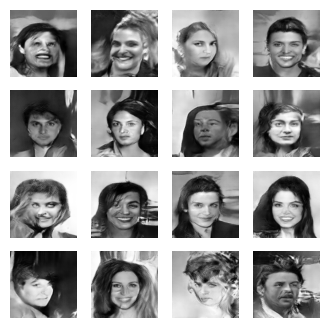

Epoch 81 done


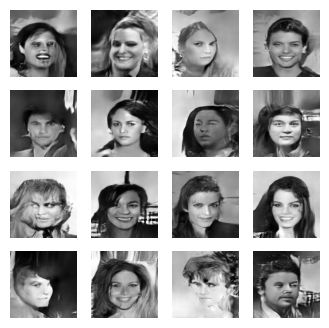

Epoch 91 done


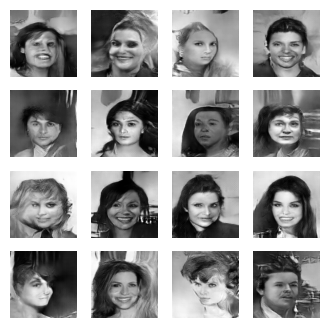

In [ ]:
epochs = 100

# Train the DCGAN

for epoch in range(epochs):
  # Loop over the batches
  for image_batch in train_dataset:
    # Train the model on the current batch
    train_step(image_batch)

  if epoch % 10 == 0:
    # Generate and save images at the end of each epoch
    generate_and_save_images(generator, epoch, test_input)
    # Print the current epoch
    print ('Epoch {} done'.format(epoch + 1))



# Generate and save the final images
generate_and_save_images(generator, epochs, test_input)



# Wasserstein GAN

The main differences between a WGAN and a standard GAN are:

* The discriminator is replaced by a critic that outputs a scalar score instead of a probability. The critic is trained to approximate the Wasserstein distance, which measures how different the distributions of the real and fake images are.

* The loss function for the generator is the negative of the critic’s score, and the loss function for the critic is the difference between the scores of the real and fake images. The critic is trained to maximize this difference, while the generator is trained to minimize it.

* The weights of the critic are clipped or regularized by a gradient penalty to ensure that the critic is a 1-Lipschitz function, which means that its gradient is bounded by 1. This prevents the critic from becoming too powerful and dominating the generator.


In [1]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf
from keras import layers

In [5]:

IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 128

# Size of the noise vector
noise_dim = 128

# Get a list of all files in the directory
files = os.listdir('original_sketch')

# Load all images into a list
images = []
for file in files:
  img = cv2.imread(os.path.join('original_sketch', file))
  im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  im_gray = cv2.resize(im_gray, (28,28), interpolation = cv2.INTER_AREA)

  images.append(im_gray)

# images = np.array(images) # convert the list to a NumPy array

# Split the images into training and testing sets
x_train, x_test = train_test_split(images, test_size=0.2)

X_train = np.stack(x_train, axis=0)
X_test = np.stack(x_test, axis=0)


X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

x_train = X_train
x_test = X_test


# Reshape each sample to (28, 28, 1) and normalize the pixel values in the [-1, 1] range
train_images = x_train

In [6]:
def conv_block(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    use_bias=True,
    use_bn=False,
    use_dropout=False,
    drop_value=0.5,
):
    x = layers.Conv2D(
        filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias
    )(x)
    if use_bn:
        x = layers.BatchNormalization()(x)
    x = activation(x)
    if use_dropout:
        x = layers.Dropout(drop_value)(x)
    return x


def get_discriminator_model():
    img_input = layers.Input(shape=IMG_SHAPE)
    # Zero pad the input to make the input images size to (32, 32, 1).
    x = layers.ZeroPadding2D((2, 2))(img_input)
    x = conv_block(
        x,
        64,
        kernel_size=(5, 5),
        strides=(2, 2),
        use_bn=False,
        use_bias=True,
        activation=layers.LeakyReLU(0.2),
        use_dropout=False,
        drop_value=0.3,
    )
    x = conv_block(
        x,
        128,
        kernel_size=(5, 5),
        strides=(2, 2),
        use_bn=False,
        activation=layers.LeakyReLU(0.2),
        use_bias=True,
        use_dropout=True,
        drop_value=0.3,
    )
    x = conv_block(
        x,
        256,
        kernel_size=(5, 5),
        strides=(2, 2),
        use_bn=False,
        activation=layers.LeakyReLU(0.2),
        use_bias=True,
        use_dropout=True,
        drop_value=0.3,
    )
    x = conv_block(
        x,
        512,
        kernel_size=(5, 5),
        strides=(2, 2),
        use_bn=False,
        activation=layers.LeakyReLU(0.2),
        use_bias=True,
        use_dropout=False,
        drop_value=0.3,
    )

    x = layers.Flatten()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(1)(x)

    d_model = keras.models.Model(img_input, x, name="discriminator")
    return d_model


d_model = get_discriminator_model()
d_model.summary()


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 32, 32, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 64)        1664      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                     

In [7]:
def upsample_block(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(1, 1),
    up_size=(2, 2),
    padding="same",
    use_bn=False,
    use_bias=True,
    use_dropout=False,
    drop_value=0.3,
):
    x = layers.UpSampling2D(up_size)(x)
    x = layers.Conv2D(
        filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias
    )(x)

    if use_bn:
        x = layers.BatchNormalization()(x)

    if activation:
        x = activation(x)
    if use_dropout:
        x = layers.Dropout(drop_value)(x)
    return x


def get_generator_model():
    noise = layers.Input(shape=(noise_dim,))
    x = layers.Dense(4 * 4 * 256, use_bias=False)(noise)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Reshape((4, 4, 256))(x)
    x = upsample_block(
        x,
        128,
        layers.LeakyReLU(0.2),
        strides=(1, 1),
        use_bias=False,
        use_bn=True,
        padding="same",
        use_dropout=False,
    )
    x = upsample_block(
        x,
        64,
        layers.LeakyReLU(0.2),
        strides=(1, 1),
        use_bias=False,
        use_bn=True,
        padding="same",
        use_dropout=False,
    )
    x = upsample_block(
        x, 1, layers.Activation("tanh"), strides=(1, 1), use_bias=False, use_bn=True
    )
    # At this point, we have an output which has the same shape as the input, (32, 32, 1).
    # We will use a Cropping2D layer to make it (28, 28, 1).
    x = layers.Cropping2D((2, 2))(x)

    g_model = keras.models.Model(noise, x, name="generator")
    return g_model


g_model = get_generator_model()


In [8]:
class WGAN(keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=3,
        gp_weight=10.0,
    ):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_steps = discriminator_extra_steps
        self.gp_weight = gp_weight

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images):
        """Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image
        alpha = tf.random.uniform([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]

        # Get the batch size
        batch_size = tf.shape(real_images)[0]

        # For each batch, we are going to perform the
        # following steps as laid out in the original paper:
        # 1. Train the generator and get the generator loss
        # 2. Train the discriminator and get the discriminator loss
        # 3. Calculate the gradient penalty
        # 4. Multiply this gradient penalty with a constant weight factor
        # 5. Add the gradient penalty to the discriminator loss
        # 6. Return the generator and discriminator losses as a loss dictionary

        # Train the discriminator first. The original paper recommends training
        # the discriminator for `x` more steps (typically 5) as compared to
        # one step of the generator. Here we will train it for 3 extra steps
        # as compared to 5 to reduce the training time.
        for i in range(self.d_steps):
            # Get the latent vector
            random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_images = self.generator(random_latent_vectors, training=True)
                # Get the logits for the fake images
                fake_logits = self.discriminator(fake_images, training=True)
                # Get the logits for the real images
                real_logits = self.discriminator(real_images, training=True)

                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )

        # Train the generator
        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            generated_images = self.generator(random_latent_vectors, training=True)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator(generated_images, training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        return {"d_loss": d_loss, "g_loss": g_loss}


In [9]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=6, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images = (generated_images * 127.5) + 127.5

        for i in range(self.num_img):
            img = generated_images[i].numpy()
            img = keras.utils.array_to_img(img)
            img.save("generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch))


In [10]:
# Instantiate the optimizer for both networks
# (learning_rate=0.0002, beta_1=0.5 are recommended)
generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)


# Define the loss functions for the discriminator,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)


# Set the number of epochs for training.
epochs = 20

# Instantiate the customer `GANMonitor` Keras callback.
cbk = GANMonitor(num_img=3, latent_dim=noise_dim)

# Get the wgan model
wgan = WGAN(
    discriminator=d_model,
    generator=g_model,
    latent_dim=noise_dim,
    discriminator_extra_steps=3,
)

# Compile the wgan model
wgan.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
)

# Start training
wgan.fit(train_images, batch_size=BATCH_SIZE, epochs=epochs, callbacks=[cbk])


Epoch 1/20
8/8 [==============================] - 17s 538ms/step - d_loss: -15.6124 - g_loss: -0.1743
Epoch 2/20
8/8 [==============================] - 2s 306ms/step - d_loss: -16.4338 - g_loss: -8.5636
Epoch 3/20
8/8 [==============================] - 2s 306ms/step - d_loss: -12.5569 - g_loss: -14.8068
Epoch 4/20
8/8 [==============================] - 2s 307ms/step - d_loss: -11.4789 - g_loss: -17.6681
Epoch 5/20
8/8 [==============================] - 2s 308ms/step - d_loss: -10.9554 - g_loss: -18.5618
Epoch 6/20
8/8 [==============================] - 2s 308ms/step - d_loss: -10.4592 - g_loss: -19.0984
Epoch 7/20
8/8 [==============================] - 2s 310ms/step - d_loss: -9.9824 - g_loss: -19.4370
Epoch 8/20
8/8 [==============================] - 3s 311ms/step - d_loss: -10.0445 - g_loss: -19.9206
Epoch 9/20
8/8 [==============================] - 3s 312ms/step - d_loss: -9.8206 - g_loss: -21.0120
Epoch 10/20
8/8 [==============================] - 3s 312ms/step - d_loss: -9.5247 - 

In [11]:
from IPython.display import Image, display

display(Image("generated_img_0_19.png"))
display(Image("generated_img_1_19.png"))
display(Image("generated_img_2_19.png"))